In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo

In [16]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("data/mexico-real-estate-clean.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


**Which state has the most expensive real estate market?**

In [17]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Querétaro                          133955.898203
Guanajuato                         133277.965833
Nuevo León                         129221.989639
Distrito Federal                   128347.278482
Quintana Roo                       128065.385263
Chihuahua                          127073.777500
Jalisco                            123386.477500
Estado de México                   122723.474134
Campeche                           121734.633333
Puebla                             121732.993684
Guerrero                           119854.278163
Sonora                             114547.995833
Morelos                            112697.299563
Aguascalientes                     110543.862000
Baja California Sur                109069.342667
Yucatán                            108580.405146
Chiapas                            104342.322000
Veracruz de Ignacio de la Llave     96928.134701
Hidalgo                             94012.348235
Sinaloa                             93922.195000
Tamaulipas    

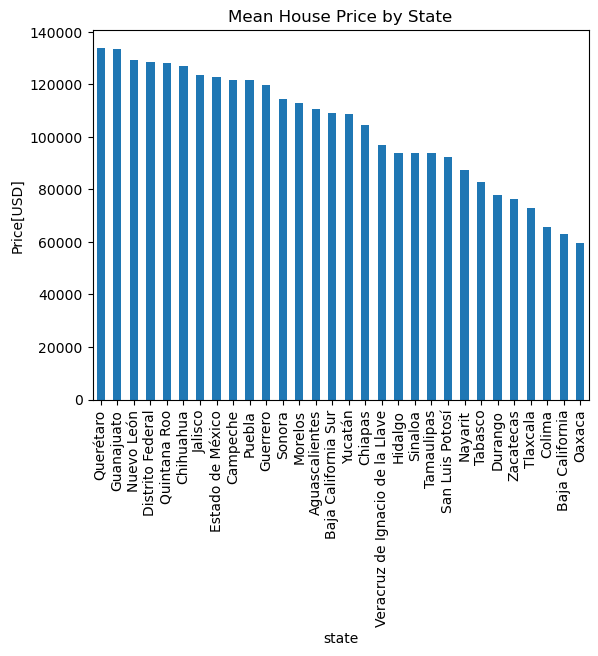

In [18]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(
    kind="bar",
    xlabel="state",
    ylabel="Price[USD]",
    title="Mean House Price by State"
    
);

In [19]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"]/df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


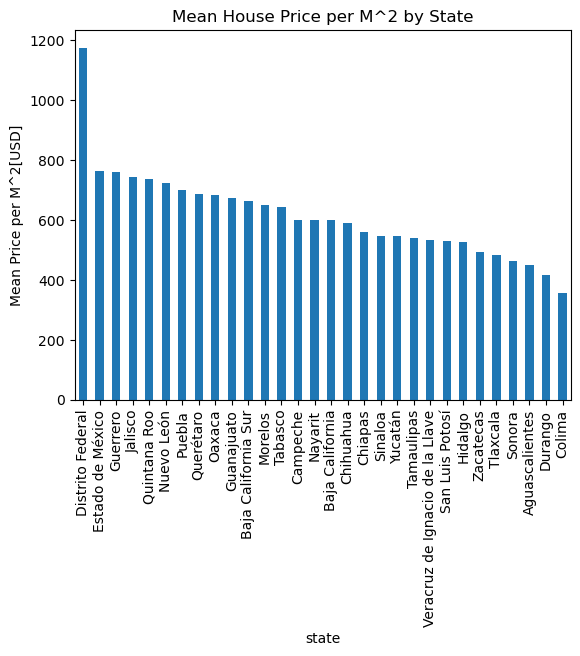

In [20]:
# Group `df` by "state", create bar chart of "price_per_m2"
(df.groupby("state")
 ["price_per_m2"].mean()
 .sort_values(ascending=False)
 .plot(
    kind="bar",
    xlabel="state",
    ylabel="Mean Price per M^2[USD]",
    title="Mean House Price per M^2 by State"
 )
);

**Is there a relationship between home size and price?**

Text(0.5, 1.0, 'area vs price')

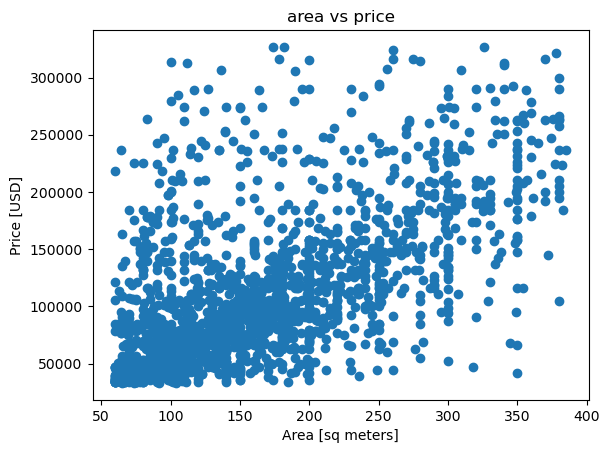

In [21]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df["area_m2"],y=df["price_usd"])
# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Price [USD]")
# Add title
plt.title("area vs price")

In [22]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5855182007637216


In [23]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df["state"]=="Morelos"]

# Print object type, shape, and head
print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head()

df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623


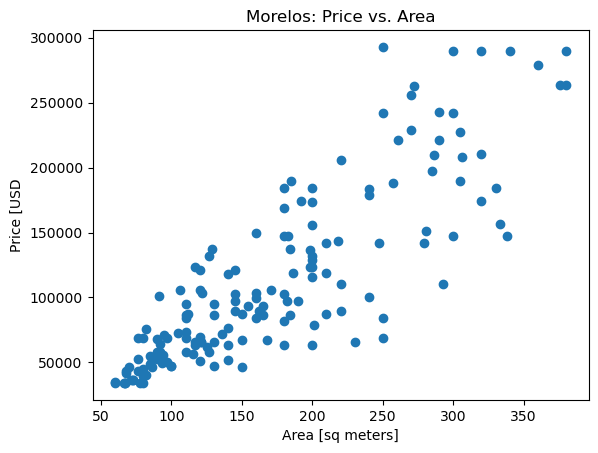

In [24]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x=df_morelos["area_m2"],y=df_morelos["price_usd"])
# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Price [USD")
# Add title
plt.title("Morelos: Price vs. Area");

In [25]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498075997350389


df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (303, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.41070391668678385


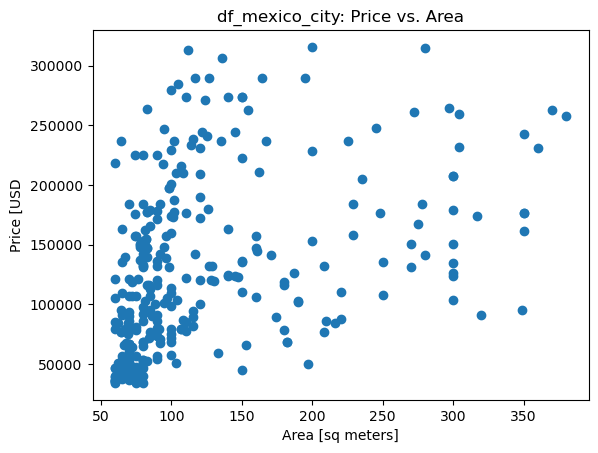

In [26]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"]== "Distrito Federal"]

# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(x=df_mexico_city["area_m2"],y=df_mexico_city["price_usd"])
# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Price [USD")
# Add title
plt.title("df_mexico_city: Price vs. Area");

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation =df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation);